In [1]:
"""
    t, y = myeulersv(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a matrix of corresponding values
of the solution, y(t_i)
"""
function myeulersv(fun, a, b, n, y1)
    t = range(a, b, n)
    neqs = length(y1)     # the number of the equations
    y = zeros(neqs, n)    # preallocate the storage for the solutions
    h = t[2] - t[1]
    y[:, 1] = y1         # store the initial conditions in the first column
    for i = 1:n-1
        k1 = h*fun(t[i], y[:, i])
        y[:, i+1] = y[:, i] + k1
    end
    return t, y
end

myeulersv

In [2]:

"""
    dydt = frict(t, y)

Right hand side of the oscillator with friction

"""

function frict(t, y)
    dydt = zeros(2)
    dydt[1] = y[2]
    dydt[2] = -y[1] - y[2]
    return dydt
end

frict (generic function with 1 method)

In [3]:
a = 0.0
b = 10.0
n = 100
y1 = [1.0, 0.0];


In [4]:
t, y = myeulersv(frict, a, b, n, y1)

(0.0:0.10101010101010101:10.0, [1.0 1.0 … -0.006372540748269553 -0.00682207512369449; 0.0 -0.10101010101010101 … -0.0044503903167068684 -0.00335716495660824])

In [5]:

using PyPlot

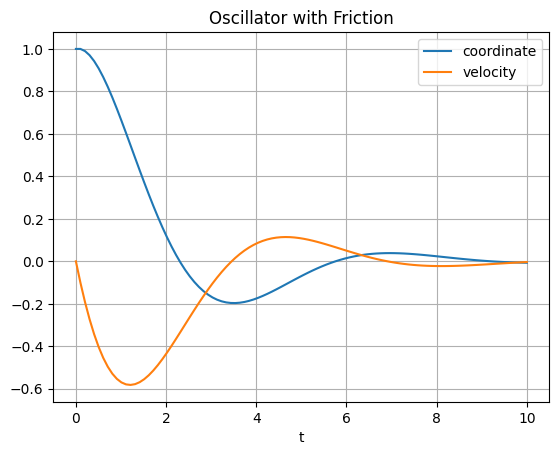

PyObject <matplotlib.legend.Legend object at 0x71575227b6b0>

In [6]:
plot(t, y[1,:], label = "coordinate")
plot(t, y[2,:], label = "velocity")
grid(true)
title("Oscillator with Friction")
xlabel("t")
legend()

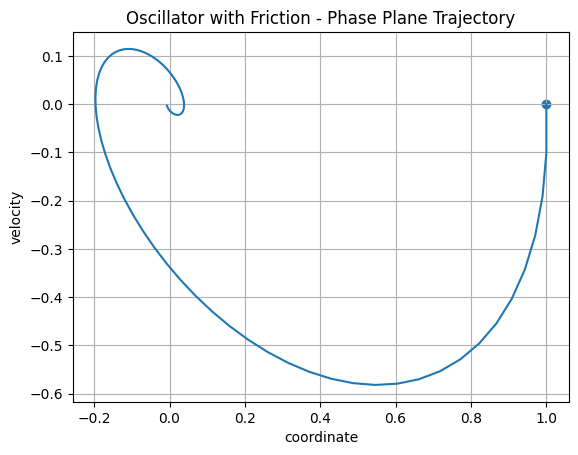

PyObject Text(24.000000000000007, 0.5, 'velocity')

In [7]:
plot(y[1,:], y[2,:])
grid(true)
scatter(y1...)
title("Oscillator with Friction - Phase Plane Trajectory")
xlabel("coordinate")
ylabel("velocity")


### Spherical Bessel Function

In [8]:

function bes(x, u)
    dudx = zeros(2)
    dudx[1] = u[2]
    dudx[2] = abs(x) > eps() ? - 2/x * u[2] - (1 - 2/x^2) * u[1] : 0 # condition ? if : else

    return dudx
end

bes (generic function with 1 method)

In [13]:

abes = 0.0
bbes = 20.0
nbes = 1000
u0bes = [0.0, 1/3];

In [10]:
x, u = myeulersv(bes, abes, bbes, nbes, u0bes)

(0.0:0.04008016032064128:20.0, [0.0 0.01336005344021376 … -0.02410329895923382 -0.021395891326308834; 0.3333333333333333 0.3333333333333333 … 0.06754982044147842 0.06823975036979044])

In [11]:

j1exact(x) = abs(x) > eps() ? sin(x)/x^2 - cos(x)/x : 0

j1exact (generic function with 1 method)

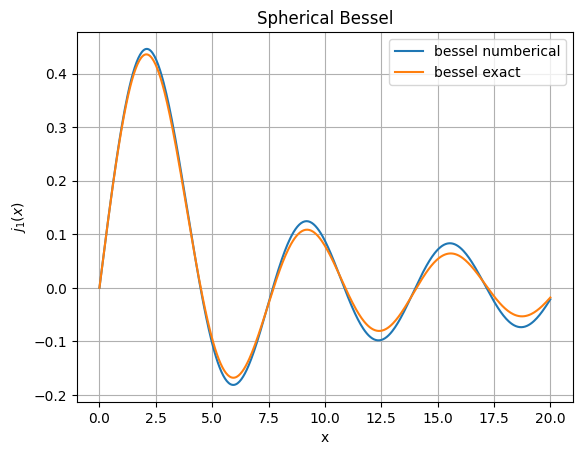

PyObject <matplotlib.legend.Legend object at 0x71574bd3d640>

In [14]:

plot(x, u[1, :], label = "bessel numberical")
plot(x, j1exact.(x), label = "bessel exact")
xlabel("x")
ylabel(L"j_1(x)")
title("Spherical Bessel")
grid(true)
legend()
